In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.svm import SVC 

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [3]:
X = df['Text']
y = df['Category']

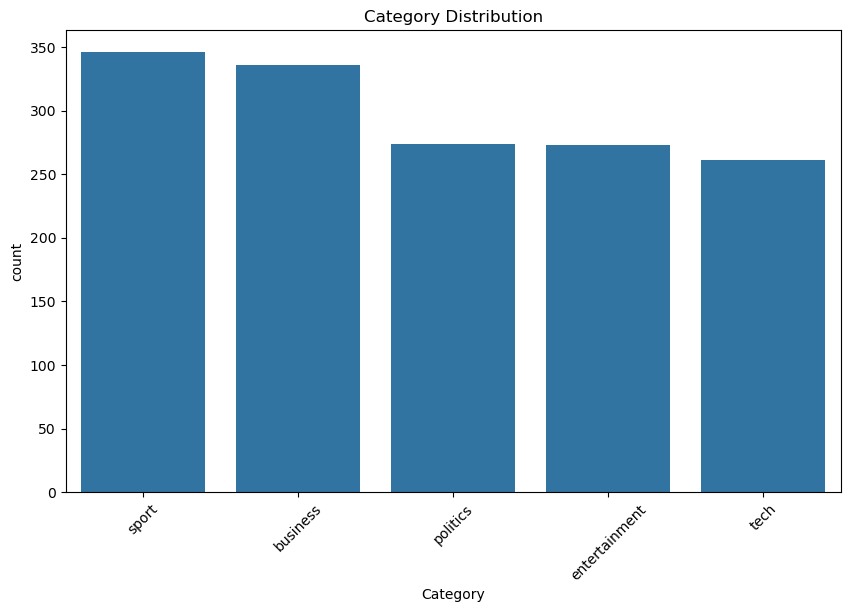

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()

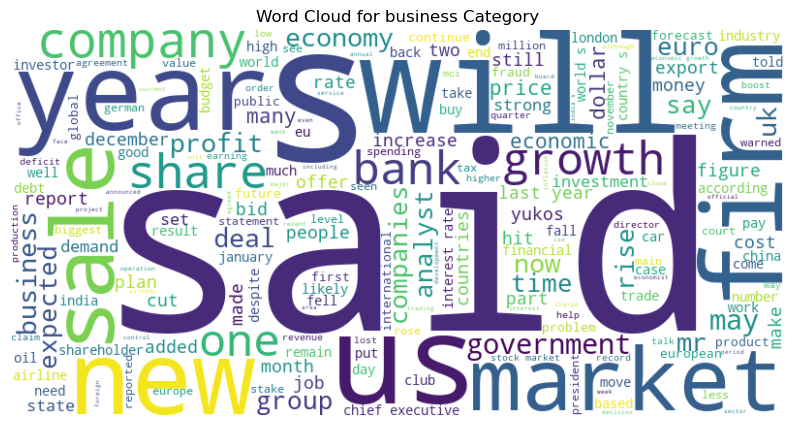

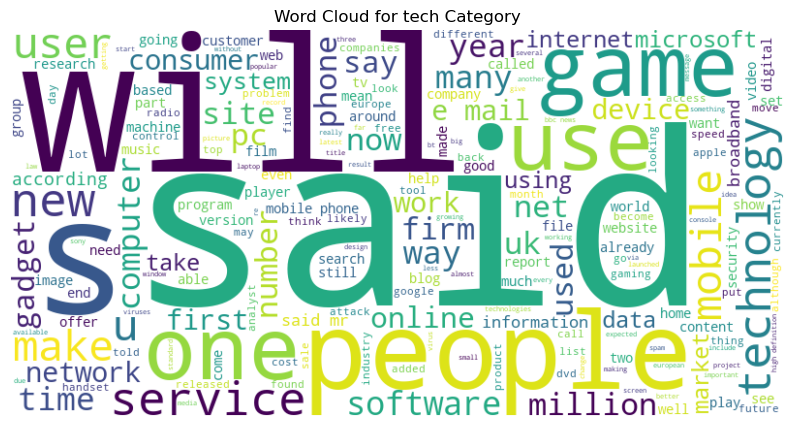

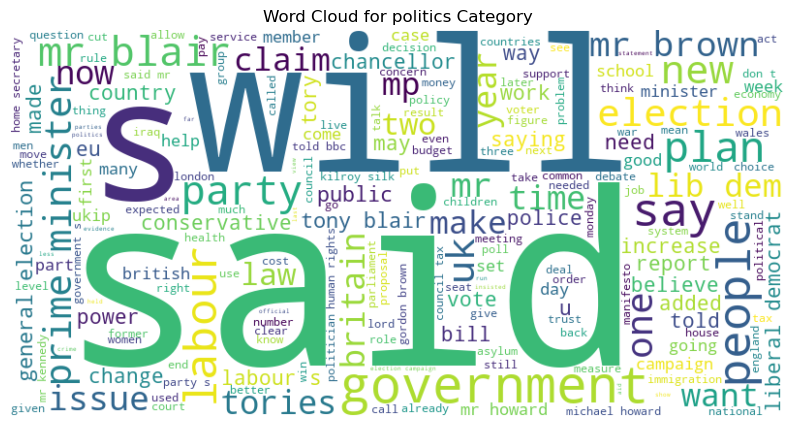

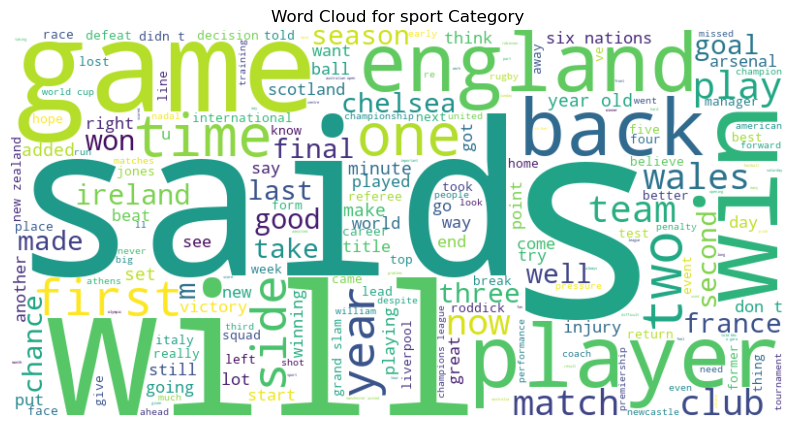

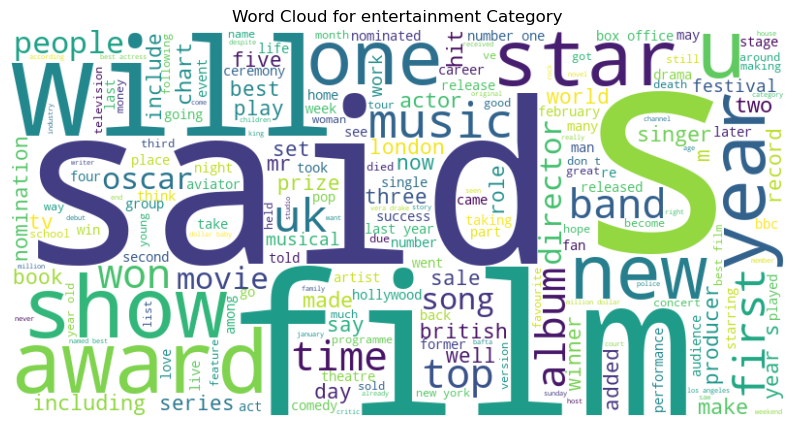

In [5]:
for category in df['Category'].unique():
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordcloud = WordCloud(
        width = 800,
        height = 400,
        background_color='white'
    ).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

In [6]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

print("Hello!! Welcome to my world@@@, 1234!")
print(preprocess_text("Hello!! Welcome to my world@@@, 1234!"))

Hello!! Welcome to my world@@@, 1234!
hello welcome world


In [8]:
df['Text'] = df['Text'].apply(preprocess_text)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
lr_model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [11]:
print("Accuracy = ",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy =  0.9664429530201343
               precision    recall  f1-score   support

     business       0.92      0.97      0.95        75
entertainment       1.00      1.00      1.00        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



In [12]:
new_texts = [
    'The latest footbal match ended in a draw, with great performances from both teams.',
    'The government announced new labour enviromental policies aimed at reducing carbon footprint'
]

new_predictions = lr_model.predict(new_texts)

for text, prediction in zip(new_texts, new_predictions):
    print(f"Text: {text}\nPredicted Category: {prediction}")

Text: The latest footbal match ended in a draw, with great performances from both teams.
Predicted Category: sport
Text: The government announced new labour enviromental policies aimed at reducing carbon footprint
Predicted Category: politics


In [15]:
import joblib
joblib.dump(lr_model, 'lr_model.joblib')

['lr_model.joblib']